Introduction

This analysis will look at games sold from the mid 1980's to the mid 2010's of the current consoles of that time.

Here are the areas that will be looked at specifically:

1) Game title
2) Year the game came out
3) Genre of the game
4) How much the game sold in North America
5) Along with the platform the game is sold on

| Title | Genre | Publisher |
|:--------:|:--------:|:--------:|
|  The title of the game   |  The genre of the game's story  |  The entity responsible for creating the game |

| Platform | Year/release_date | NA_Sales |
|:--------:|:--------:|:--------:|
|  The console the game is designed for  |  The year orday the game was released  |  The number of copies sold in North America   |

Applying the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the Data and Cleaning What Needs to be Edited Out

In [2]:
platform = pd.read_csv('vgsales.csv')

platform.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# Making the dataframe name for the vgchartz csv.
games_2024 = pd.read_csv('vgchartz-2024.csv')


# Displaying the first ten games on the csv that goes to 2024.

games_2024.head(10)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,NaN
6,/games/boxart/full_call-of-duty-black-ops_5Ame...,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09,NaN
7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02
8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13,2018-04-07
9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13,2018-04-07


This data set contained images that did not show on vs code, only giving the url to these pictures of the games. Dropped the column that used the images helps with visualization when looking at the chart. Along with dropping the picture column, four other columns were dropped: na_sales, jp_sales, pal_sales and other_sales. I wanted to get the total sales of the games all together, not what countries had the sales of the specific games.

In [4]:
drop = ['img', 'developer', 'critic_score', 'total_sales', 'jp_sales', 'pal_sales', 'other_sales', 'last_update']

games_2024 = games_2024.drop(columns=drop)

games_2024.head()

,title,console,genre,publisher,na_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,6.37,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,6.06,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,8.41,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,9.06,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,6.18,2015-11-06


Dropping the columns that will not be looked at and merging the two csv's into one.

In [5]:
drop = ['EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

platform = platform.drop(columns=drop)

platform.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27


In [6]:
games_2024

,title,console,genre,publisher,na_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,6.37,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,6.06,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,8.41,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,9.06,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,6.18,2015-11-06
...,...,...,...,...,...,...
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,NaN,2016-08-11
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,NaN,2020-07-30
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,NaN,2020-07-30
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,NaN,2019-02-28


In [7]:
platform

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27
...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00


In [8]:
games = pd.merge(games_2024[['title', 'release_date']], platform, left_on='title', right_on='Name', how='left')

games

,title,release_date,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales
0,Grand Theft Auto V,2013-09-17,17.0,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01
1,Grand Theft Auto V,2013-09-17,24.0,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63
2,Grand Theft Auto V,2013-09-17,45.0,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80
3,Grand Theft Auto V,2013-09-17,198.0,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.66
4,Grand Theft Auto V,2013-09-17,1898.0,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36
...,...,...,...,...,...,...,...,...,...
86743,XBlaze Lost: Memories,2016-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86744,"Yoru, Tomosu",2020-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86745,"Yoru, Tomosu",2020-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86746,Yunohana SpRING! ~Mellow Times~,2019-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Getting the total amount of dollars in video games sales in North America alone.

In [9]:
games.to_csv("games.csv")
games

,title,release_date,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales
0,Grand Theft Auto V,2013-09-17,17.0,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01
1,Grand Theft Auto V,2013-09-17,24.0,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63
2,Grand Theft Auto V,2013-09-17,45.0,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80
3,Grand Theft Auto V,2013-09-17,198.0,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.66
4,Grand Theft Auto V,2013-09-17,1898.0,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36
...,...,...,...,...,...,...,...,...,...
86743,XBlaze Lost: Memories,2016-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86744,"Yoru, Tomosu",2020-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86745,"Yoru, Tomosu",2020-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86746,Yunohana SpRING! ~Mellow Times~,2019-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
Total = games['NA_Sales'].sum()
print("In North America", games['NA_Sales'].sum(), "in copies, was made in video games.")

In North America 15003.32 in copies, was made in video games.


Now getting the total of the top 5 games in North America.

In [11]:
ps4_games = games.loc[(games['Year'] == 2015) & (games['Platform'] == 'PS4')]
ps4_games

ps4_games["Platform"].unique()

array(['PS4'], dtype=object)

In [12]:
call_of_duty = games[games["title"]== "Call of Duty: Black Ops 3"].sum()
call_of_duty

title           Call of Duty: Black Ops 3Call of Duty: Black O...
release_date    2015-11-062015-11-062015-11-062015-11-062015-1...
Rank                                                      45790.0
Name            Call of Duty: Black Ops 3Call of Duty: Black O...
Platform        PS4XOnePS3X360PCPS4XOnePS3X360PCPS4XOnePS3X360...
Year                                                      50375.0
Genre           ShooterShooterShooterShooterShooterShooterShoo...
Publisher       ActivisionActivisionActivisionActivisionActivi...
NA_Sales                                                    59.45
dtype: object

In [13]:
sort_games = pd.concat([
     games[games['Year'] == 2015].sort_values(by='NA_Sales', ascending=False),
     games[games['Year'] != 2015]
])


sort_games = sort_games.replace('nan', np.nan)

filter_year = sort_games[sort_games["Year"].notnull()]

filter_year["Year"] = filter_year["Year"].astype(int)

filter_year["Year"].unique()

C:\Users\Jake Guerrero\AppData\Local\Temp\ipykernel_8972\664082683.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_year["Year"] = filter_year["Year"].astype(int)


array([2015, 2013, 2014, 2002, 2003, 2011, 2010, 2012, 2009, 2001, 2008,
       2016, 2007, 2005, 2006, 2004, 1999, 1996, 1997, 2000, 1980, 1998,
       1989, 1981, 1995, 1992, 1994, 1990, 1993, 1982, 1985, 1983, 1984,
       1986, 1991, 1987, 1988, 2020, 2017])

In [14]:
top_2015_games = games[games['Year'] == 2015].nlargest(5, 'NA_Sales')

sum_top_5 = top_2015_games['NA_Sales'].sum()

print("The sum of copies for the top five games of 2015 are:", sum_top_5, "in millions")

The sum of copies for the top five games of 2015 are: 28.849999999999998 in millions


Below shows the top 5 games sold per million in physical copies.

In [15]:
games_2015 = games[games['Year'] == 2015]

games_totals = games_2015.groupby('title')['NA_Sales'].sum()
games_totals

top_games = games_totals.sort_values(ascending=False).head()
top_games

title
Call of Duty: Black Ops 3       59.45
NBA 2K16                        33.84
Madden NFL 16                   23.12
Fallout 4                       21.68
Star Wars Battlefront (2015)    20.00
Name: NA_Sales, dtype: float64

In [25]:
games_2015 = games[games['Year'] == 2015]

total_games = games_2015.groupby('title')['NA_Sales'].sum()

games_top_5 = total_games.sort_values(ascending=False).head

games_top_5

<bound method NDFrame.head of title
Call of Duty: Black Ops 3                               59.45
NBA 2K16                                                33.84
Madden NFL 16                                           23.12
Fallout 4                                               21.68
Star Wars Battlefront (2015)                            20.00
                                                        ...  
Mario vs. Donkey Kong: Tipping Stars                     0.00
Medarot 9: Kabuto Ver. / Kuwagata Ver.                   0.00
MeiQ no Chika Ni Shisu: A Maze to Eradicate Them All     0.00
7 Roses: A Darkness Rises                                0.00
Meiji Toukyou Renka: Twilight Kiss                       0.00
Name: NA_Sales, Length: 329, dtype: float64>

Getting the top 5 publishers that sold the most copies of games in millions in 2015

In [17]:
games = games[games['Year'] == 2015]

pub_2015_sales = games.groupby('Publisher')['NA_Sales'].sum()

pub_2015_sales = pub_2015_sales.sort_values(ascending=False)

pub_2015_sales.head()

Publisher
Activision                                82.99
Electronic Arts                           72.89
Warner Bros. Interactive Entertainment    50.87
Take-Two Interactive                      47.04
Bethesda Softworks                        27.21
Name: NA_Sales, dtype: float64

In [19]:
most_genre = games['Genre'].value_counts()

top_genre = most_genre.idxmax()

print(f"The top genre is: {top_genre}")

The top genre is: Action


In [20]:
genre_counts = games['Genre'].value_counts()

print("Genre Counts:")
print(genre_counts)

Genre Counts:
Genre
Action          832
Sports          295
Role-Playing    176
Adventure       159
Shooter         137
Misc             95
Racing           86
Platform         64
Simulation       49
Fighting         45
Strategy         32
Puzzle           12
Name: count, dtype: int64


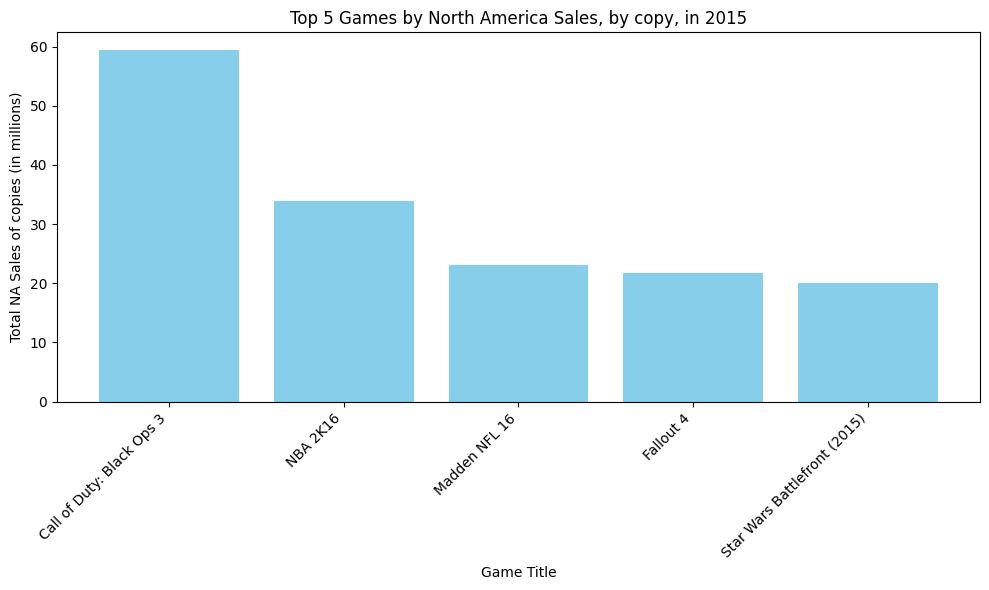

In [21]:
# question number 1

games_2015 = games[games['Year'] == 2015]

total_games = games_2015.groupby('title')['NA_Sales'].sum()

games_top_5 = total_games.sort_values(ascending=False).head()

games_top_5

plt.figure(figsize=(10, 6))
plt.bar(games_top_5.index, games_top_5.values, color='skyblue')
plt.title('Top 5 Games by North America Sales, by copy, in 2015')
plt.xlabel('Game Title')
plt.ylabel('Total NA Sales of copies (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bar chart above shows a visual of the top 5 games sold in 2015, by copies in millions.

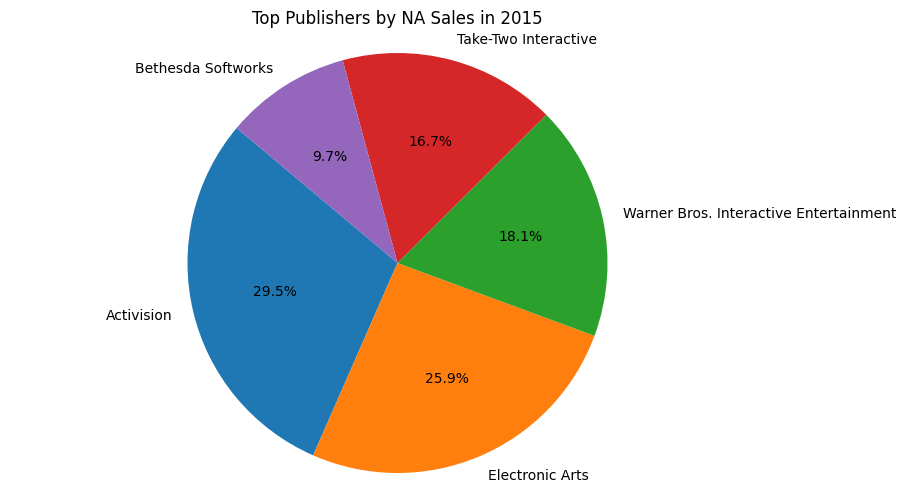

In [22]:
games_2015 = games[games['Year'] == 2015]

pub_2015_sales = games_2015.groupby('Publisher')['NA_Sales'].sum()

pub_2015_sales = pub_2015_sales.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.pie(pub_2015_sales.head(), labels=pub_2015_sales.head().index, autopct='%1.1f%%', startangle=140)
plt.title('Top Publishers by NA Sales in 2015')
plt.axis('equal')
plt.show()

The pie chart shows how many games the publishers made, in percent in millions, in 2015

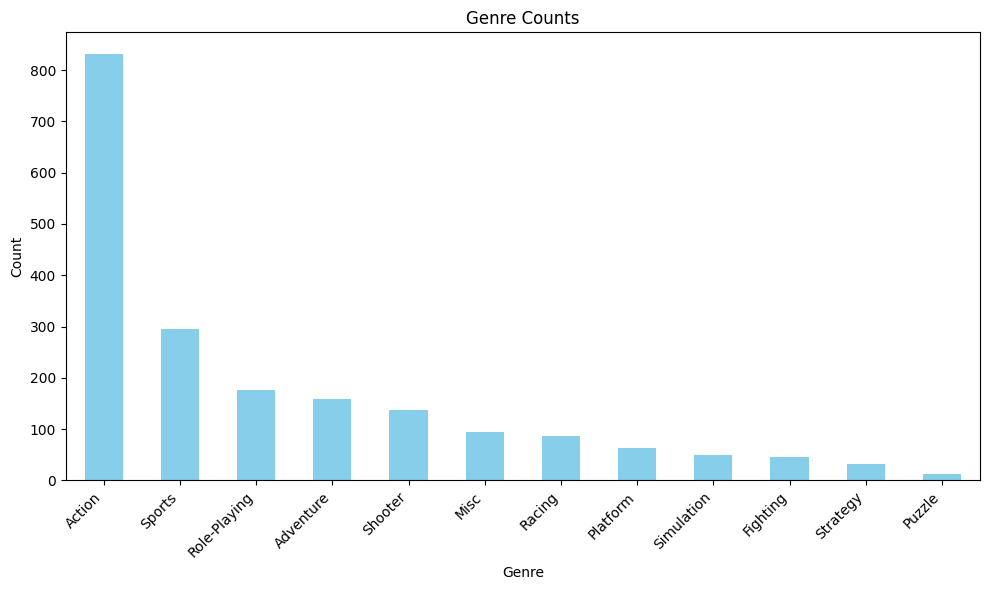

In [23]:
genre_counts = games['Genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bar chart above tells of how many games total were made, in the games.csv.